In [17]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [18]:
%cd /content/gdrive/MyDrive/NLP2021/TextClassification

/content/gdrive/MyDrive/NLP2021/TextClassification


In [19]:
!ls

 20_newsgroup.csv	       'Document Clustering.ipynb'
 20newsgroup.csv	        FreqDist.ipynb
 20_newsgroup.gsheet	        hierarchical.ipynb
'bbc_preprocessed (1).gsheet'   k-means.ipynb
'bbc_preprocessed (2).gsheet'   knn.pkl
 bbc_preprocessed.csv	       'Lab Exercise 9 - Text Classifier'
 bbc_preprocessed.gsheet        lda_bbcnews.ipynb
 bbc_preprocessed_sport.csv    'LM 6.1 kNN.ipynb'
 bbcsport		       'LM 6.2 SVM.ipynb'
 bbcsport-fulltext.zip	       'LM 6.3 NaiveBayes.ipynb'
 bbc_sports.ipynb	        lsi_bbcnews.ipynb
 bbc-text.csv		        preprocess.ipynb
 bbc-text.gsheet	        Untitled0.ipynb
 Consumer_Citibank.ipynb        Untitled1.ipynb
 consumer.csv		        v.csv
 Co-occurrence_SVD.ipynb        vectorized.csv
 dataset.csv		        v.gsheet
 dataset.gsheet		        wordcloud.ipynb


In [20]:
#!wget https://raw.githubusercontent.com/suraj-deshmukh/BBC-Dataset-News-Classification/master/dataset/dataset.csv

In [21]:
#!wget https://storage.googleapis.com/dataset-uploader/bbc/bbc-text.csv

In [22]:
import pandas as pd
df = pd.read_csv('bbc-text.csv')
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [23]:
df.head(30)

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
5,politics,howard hits back at mongrel jibe michael howar...
6,politics,blair prepares to name poll date tony blair is...
7,sport,henman hopes ended in dubai third seed tim hen...
8,sport,wilkinson fit to face edinburgh england captai...
9,entertainment,last star wars not for children the sixth an...


In [24]:
df.shape

(2225, 2)

run a notebook - use the functions

In [25]:
%run preprocess.ipynb

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


https://pandas.pydata.org/docs/reference/api/pandas.factorize.html

In [26]:
df['category_id'] = df['category'].factorize()[0]

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html

In [27]:
df['clean_text'] = df['text'].apply(preprocess)
df.head(10)

,category,text,category_id,clean_text
0,tech,tv future in the hands of viewers with home th...,0,tv futur hand viewer home theatr system plasma...
1,business,worldcom boss left books alone former worldc...,1,worldcom boss left book alon former worldcom b...
2,sport,tigers wary of farrell gamble leicester say ...,2,tiger wari farrel gambl leicest say rush make ...
3,sport,yeading face newcastle in fa cup premiership s...,2,yead face newcastl fa cup premiership side new...
4,entertainment,ocean s twelve raids box office ocean s twelve...,3,ocean twelv raid box offic ocean twelv crime c...
5,politics,howard hits back at mongrel jibe michael howar...,4,howard hit back mongrel jibe michael howard sa...
6,politics,blair prepares to name poll date tony blair is...,4,blair prepar name poll date toni blair like na...
7,sport,henman hopes ended in dubai third seed tim hen...,2,henman hope end dubai third seed tim henman sl...
8,sport,wilkinson fit to face edinburgh england captai...,2,wilkinson fit face edinburgh england captain j...
9,entertainment,last star wars not for children the sixth an...,3,last star war children sixth final star war mo...


In [28]:
#save the pre-processed dataframe
df.to_csv('bbc_preprocessed.csv')

find the mapping between class labels and factorized number

In [29]:
print(df.category_id.unique(),df.category.unique())

[0 1 2 3 4] ['tech' 'business' 'sport' 'entertainment' 'politics']


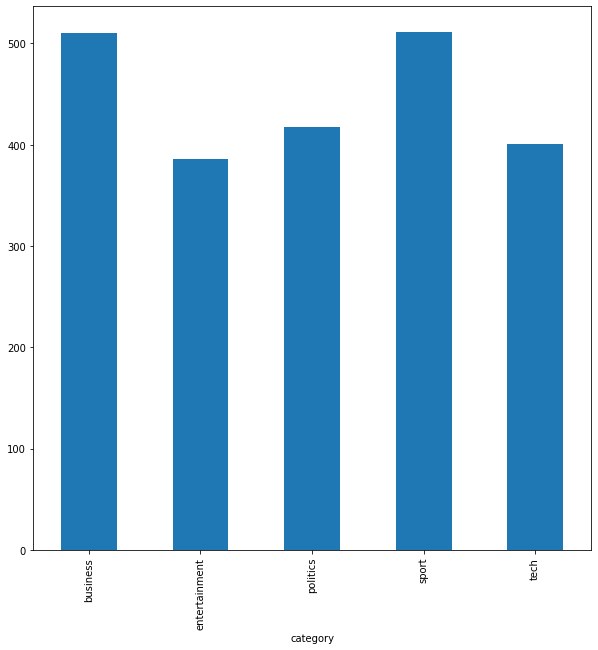

In [30]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
df.groupby('category').text.count().plot.bar(ylim=0)
plt.show()

#Vectorize Text Data

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

texts = df['clean_text'] # getting the text column

tfidf_vectorizer = TfidfVectorizer() #tfidf

X = tfidf_vectorizer.fit_transform(texts) #features -> text data

y = df['category_id'].values #target --> labels/classes

print(X.shape)
print(y.shape)

#2225,2 --> 2225, 18536  
#18536 unique words - tfidf

(2225, 18536)
(2225,)


In [32]:
#print(X.toarray())
dataset = pd.DataFrame(X.toarray())

temp = dataset.sample(20)
temp.to_csv('vectorized.csv')

if you want to reduce the dimensions

In [34]:
#import numpy as np

#u, s, vh = np.linalg.svd(X[:20].toarray(), full_matrices=True)

In [ ]:
#t=pd.DataFrame(u)
#t

#Training and Testing data

Splitting data into training set and test set

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

stratify --> balance the classes

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, shuffle = True, stratify = y,random_state = 3)

#KNN

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html


Creating the classifier/model/estimator using training set

In [36]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()  #KNeighborsClassifier(5)

knn.fit(X_train, y_train)  #training dataset

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [37]:
#knn  --> classifier or model

fit -- > create the model


predict--> test the model also unseen data

#Evaluating your model 
Using test set

Accuracy Score

score() --> check the accuracy

In [39]:
knn.score(X_test,y_test)

0.9341317365269461

In [38]:
predicted = knn.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predicted)

0.9341317365269461

#Confusion Matrix

In [41]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_true=y_test, y_pred=predicted)
confusion

array([[117,   1,   0,   0,   2],
       [  9, 136,   0,   1,   7],
       [  0,   2, 151,   0,   1],
       [  8,   2,   2, 100,   4],
       [  1,   1,   2,   1, 120]])

https://seaborn.pydata.org/generated/seaborn.heatmap.html

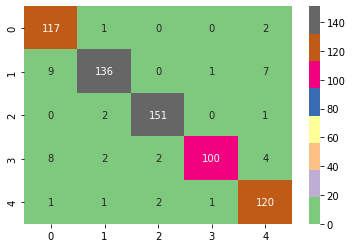

In [42]:
import matplotlib.pyplot as plt
import seaborn as sn
sn.heatmap(confusion, annot=True,fmt="d",cmap=plt.cm.Accent)
plt.show()

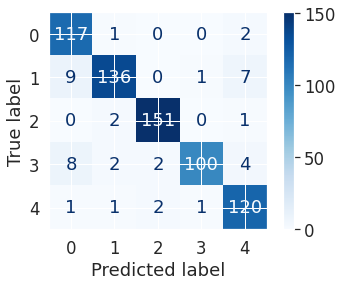

In [43]:

from sklearn.metrics import plot_confusion_matrix


sn.set(font_scale=1.5) # for label size

plot_confusion_matrix(knn, X_test, y_test,cmap=plt.cm.Blues,values_format='1')
plt.show()

Classification report

In [44]:
from sklearn.metrics import classification_report
from pprint import pprint

In [45]:
pprint(classification_report(y_test, predicted))

('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.87      0.97      0.92       120\n'
 '           1       0.96      0.89      0.92       153\n'
 '           2       0.97      0.98      0.98       154\n'
 '           3       0.98      0.86      0.92       116\n'
 '           4       0.90      0.96      0.93       125\n'
 '\n'
 '    accuracy                           0.93       668\n'
 '   macro avg       0.93      0.93      0.93       668\n'
 'weighted avg       0.94      0.93      0.93       668\n')


#Testing with new data instance

In [46]:
new_news = 'Kotak Institutional Equities expects modest returns from the Indian stock market in the base-case scenario of a strong economic recovery and a gradual increase in global and domestic bond yields, but stock-specific action will continue, especially in midcaps.'
#preprocess, vectorize
vec = tfidf_vectorizer.transform([new_news])
y_predict = knn.predict(vec)

In [47]:
classes = {0:'tech',1:'business',2:'sport',3:'entertainment',4:'politics'}
classes[y_predict[0]]

'business'